In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import r2_score

In [6]:
# Load the datasets
data = pd.read_csv('../DataSet/dataset.csv')
#just_features = pd.read_csv('/home/freitas/ProjetoPraticoIA/DataSet/just_features.csv')

In [7]:
# Prepare the data map the necessary parameters
# Mapping for 'tipo'
tipo_mapping = {'limousine': 0, 'coupe': 1, 'compacto': 2, 'kombi': 3, 'carrinha': 4, 'cabrio': 5, 'suv': 6, 'outro': 7}
data['tipo'] = data['tipo'].map(tipo_mapping)

# Mapping for 'caixa'
caixa_mapping = {'manual': 0, 'automatica': 1}
data['caixa'] = data['caixa'].map(caixa_mapping)

#Mapping for 'com_danos'
com_danos_mapping = {'nao': 0, 'sim': 1}
data['com_danos'] = data['com_danos'].map(com_danos_mapping)

# Mapping for 'combustivel'
combustivel_mapping = {'gasolina': 0, 'diesel': 1, 'outro': 2}
data['combustivel'] = data['combustivel'].map(combustivel_mapping)

# Mapping for 'marca' (assuming 'marca' has too many unique values)
marca_mapping = {marca: i for i, marca in enumerate(data['marca'].unique())}
data['marca'] = data['marca'].map(marca_mapping)

In [8]:
# Display the preprocessed data
data.describe()

,id,tipo,ano_registo,caixa,potencia,km,combustivel,marca,com_danos,preco
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,49878.823840,2.282600,2006.577600,0.251480,137.546760,121195.808000,0.431080,2.931400,0.087800,7876.264120
std,28932.226902,1.830386,4.283129,0.433872,214.565586,41268.626786,0.530341,2.583951,0.283009,11657.351891
min,1.000000,0.000000,2000.000000,0.000000,3.000000,5000.000000,0.000000,0.000000,0.000000,1.000000
25%,24673.750000,0.000000,2003.000000,0.000000,90.000000,90900.000000,0.000000,1.000000,0.000000,2389.000000
50%,49997.500000,2.000000,2006.000000,0.000000,122.000000,150100.000000,0.000000,2.000000,0.000000,5030.000000
75%,75016.500000,3.000000,2010.000000,1.000000,163.000000,150600.000000,1.000000,5.000000,0.000000,10020.000000
max,99998.000000,7.000000,2017.000000,1.000000,16312.000000,151000.000000,2.000000,9.000000,1.000000,745060.000000


In [9]:
y = data['preco']

In [10]:
# The input and output features preparation
X = data.drop(['preco', 'id'], axis = 1)

In [11]:
X.shape

(25000, 8)

In [12]:
print(X[:10])

   tipo  ano_registo  caixa  potencia      km  combustivel  marca  com_danos
0     0         2014      0       140   40800            0      0          0
1     0         2013      0       184   30300            1      1          0
2     1         2009      0       177  150900            1      1          0
3     2         2006      0        54  150500            0      2          0
4     0         2015      0       150   40600            1      2          0
5     0         2002      0       179  150000            0      3          0
6     3         2014      0       110   60300            1      4          0
7     2         2006      0        43  125600            0      0          0
8     3         2011      0       125   70400            0      3          0
9     0         2009      1       116  125800            0      4          0


In [13]:
#Spliting the data into training and testing dataset
from sklearn.model_selection import train_test_split
#Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20000, 8) (5000, 8) (20000,) (5000,)


In [15]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [16]:
# Instantiation of the model
model = RandomForestRegressor(random_state = 84)

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X, y)  # X and y should be replaced with your data and target variable

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [17]:
# Fitting the model
price_rf = model.fit(X_train, y_train)

In [18]:
# Training model evaluation

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [20]:
# The training r_sq
print(f'The trained r_sq is: %.2f'%price_rf.score(X_train, y_train))

The trained r_sq is: 0.95


In [21]:
y_train_pred = price_rf.predict(X_train)

In [22]:
# The MAE
print('The MAE is: %.2f'%mean_absolute_error(y_train, y_train_pred))

The MAE is: 698.29


In [23]:
# The MSE
print('The MSE is: %.2f'%mean_squared_error(y_train, y_train_pred))

The MSE is: 5588182.99


In [24]:
# THE RMSE
import numpy as np
print('The RMSE is: %.2f'%np.sqrt(mean_squared_error(y_train, y_train_pred)))

The RMSE is: 2363.93


In [25]:
# The EVS
print('The EVS is: %.2f'%explained_variance_score(y_train, y_train_pred))

The EVS is: 0.95


In [26]:
# Prediction on testing data
y_test_pred = price_rf.predict(X_test)

In [27]:
print(y_test_pred[:100])

[ 2678.955       7569.335       8798.32166667  4635.71
  8851.86        1353.52091667  5744.42        6326.26
  9301.63         931.26666667 10556.72        2605.485
  7969.885       3276.73333333  2787.5725      1294.35058333
  3888.965        886.375       2949.6         9818.16
  9720.49625    15427.3         3480.365       4622.22765873
 12856.91        1522.20425    39439.6        16411.04166667
  9598.10166667 26218.145      12373.1        10134.12
  6520.20266667 10766.46166667  1105.19666667 10051.47857143
  2556.1975     10057.855       5197.61166667 12207.32958333
 25553.55        3661.65        6122.525      11442.83708333
  2243.8575     10664.135      13730.335       3002.13071429
  3426.14666667  5981.31        1622.33261905 31431.45
 12497.268       1798.45083333  1036.46666667  8452.90333333
  7207.315       1870.04966667   919.33        5235.765
 10719.39        2890.095       1201.54820833  1341.22
  7893.29       29275.04        2441.70214286  2049.92577381
  4300.05

In [28]:
# The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, y_test_pred))

The testing r_sq is: 0.80


In [29]:
# Or
print('The testing r_sq is: %.2f'% price_rf.score(X_test, y_test))

The testing r_sq is: 0.80


In [30]:
# The metrics

In [31]:
#The MAE
print('The MAE IS: %.2f'%mean_absolute_error(y_test, y_test_pred))

The MAE IS: 1854.50


In [32]:
#The MSE
print('The MSE IS: %.2f'%mean_squared_error(y_test, y_test_pred))

The MSE IS: 38273756.30


In [33]:
# THE RMSE
print('The RMSE IS: %.2f'%np.sqrt(mean_squared_error(y_test, y_test_pred)))

The RMSE IS: 6186.58


In [34]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, y_test_pred))

The EVS is: 0.80


In [35]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/31/ec/1aeea536f14a03dd26679d7bfeb9b164379009afb71086476816d7a6ea8c/fonttools-4.47.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     ------------------- ------------------- 81.9/160.4 kB 4.5 MB/s e


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


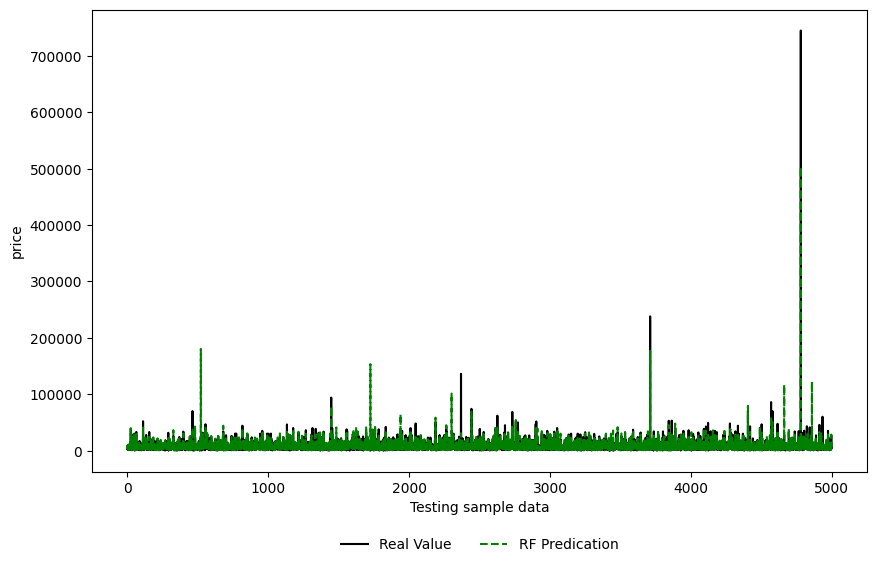

In [36]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))
#Ploting
plt.plot(x_ax, y_test, label = 'Real Value', color = 'k', linestyle = '-')
plt.plot(x_ax, y_test_pred, label = 'RF Predication', color = 'green', linestyle = '--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

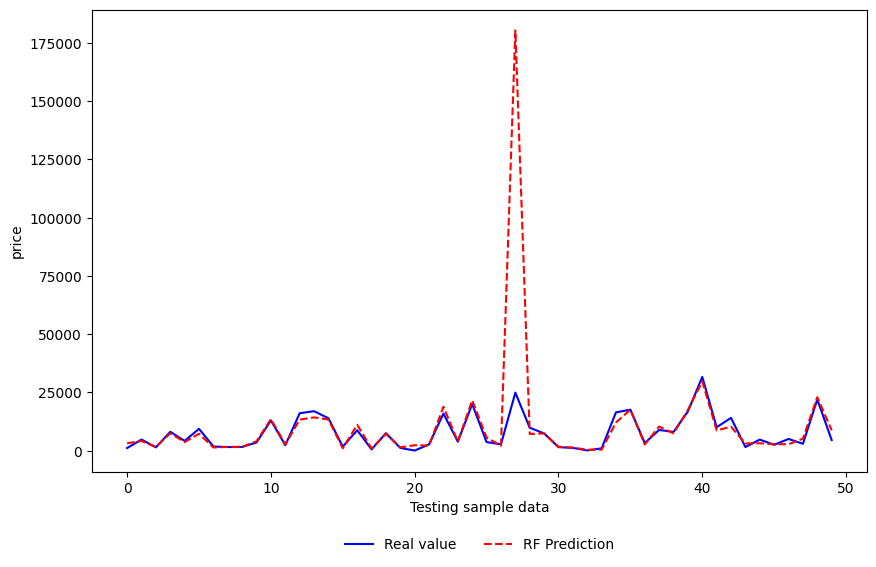

In [37]:
# Plot a more visualized view
import random as rd

# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(0, 50)
# Setting random search plot

st = rd.randint(0, 4550) #start
nd = st + 50 #end

# Plotting
plt.plot(x_ax, y_test[st:nd], label = 'Real value', color = 'blue', linestyle = '-')
plt.plot(x_ax, y_test_pred[st:nd], label = 'RF Prediction', color = 'red', linestyle = '--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

In [40]:
pip install yellowbrick

In [41]:
from yellowbrick.regressor import PredictionError

# For plotting clarity concatenated redundant values
lower_bound = 100
upper_bound = 150000

# Filter X_test and y_test based on the desired range
indices_within_range = np.where((y_test >= lower_bound) & (y_test <= upper_bound))[0]
X_test_within_range = X_test.iloc[indices_within_range]
y_test_within_range = y_test.iloc[indices_within_range]

# Create PredictionError visualizer with the filtered data
visualizer = PredictionError(price_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test_within_range, y_test_within_range)
visualizer.poof()

ModuleNotFoundError: No module named 'distutils'

In [42]:
from yellowbrick.regressor import PredictionError
import matplotlib.pyplot as plt
import numpy as np

# Assuming your desired lower and upper bounds are 100 and 150000, respectively
lower_bound = 100
upper_bound = 150000

# Filter X_test and y_test based on the desired range
indices_within_range = np.where((y_test >= lower_bound) & (y_test <= upper_bound))[0]
X_test_within_range = X_test.iloc[indices_within_range]
y_test_within_range = y_test.iloc[indices_within_range]

# Create PredictionError visualizer with the filtered data
visualizer = PredictionError(price_rf)
visualizer.fit(X_train, y_train)

# Predict on the filtered test data
y_pred_within_range = price_rf.predict(X_test_within_range)

# Filter predicted values within the specified range
indices_y_pred_within_range = np.where((y_pred_within_range >= lower_bound) & (y_pred_within_range <= upper_bound))[0]
y_test_within_range_filtered = y_test_within_range.iloc[indices_y_pred_within_range]
y_pred_within_range_filtered = y_pred_within_range[indices_y_pred_within_range]

# Fit the visualizer on the filtered test data and predicted values within the range
visualizer.score(X_test_within_range, y_test_within_range)
visualizer.poof()

# Set the y-axis limits to display only the specified range for both y and y_hat
plt.ylim(lower_bound, upper_bound)
plt.scatter(y_test_within_range_filtered, y_pred_within_range_filtered, edgecolors=(0, 0, 0))
plt.plot([lower_bound, upper_bound], [lower_bound, upper_bound], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error')
plt.show()


ModuleNotFoundError: No module named 'distutils'

In [43]:
# Plotting Residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(price_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

ModuleNotFoundError: No module named 'distutils'

In [44]:
# The k-fold CV
from sklearn.model_selection import cross_val_score

In [45]:
seed = 5 #set to fixed value to check same result

In [46]:
# Training model CV
score_train = cross_val_score(price_rf, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)

In [47]:
score_train

array([-2.38210233e+07, -1.10450688e+07, -1.16963852e+07, -2.48172672e+07,
       -1.10201686e+08, -1.35256633e+07, -7.26873232e+07, -7.69794056e+07,
       -5.93371646e+07, -1.79077012e+07])

In [48]:
# The mean score
print(score_train.mean())

-42201868.88292886


In [49]:
# The absolute mean score
print(abs(score_train.mean()))

42201868.88292886


In [ ]:
# The testing model CV
score_test = cross_val_score(price_rf, X_test, y_test, scoring='neg_mean_squared_error', cv = 10)

In [ ]:
score_test

In [ ]:
# The mean score
print(score_train.mean())

In [ ]:
# The absolute mean score
print(abs(score_train.mean()))

In [ ]:
# Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [ ]:
f_list = list(X.columns)
f_importance = pd.Series(price_rf.feature_importances_, index = f_list).sort_values(ascending=False)

In [ ]:
print(f_importance)

In [ ]:

# Data preprocessing
# You may need to perform additional data preprocessing steps based on your dataset

# Split the dataset into features and target variable
X = data.drop('preco', axis=1)  # Features
y = data['preco']  # Target variable

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Fit the model
model.fit(X, y)

# Use the trained model to predict prices for just_features dataset
predicted_prices = model.predict(just_features)

# Create a DataFrame with predicted prices and IDs
predicted_df = pd.DataFrame({'id': just_features['id'], 'preco': predicted_prices})

# Save the predicted prices to a CSV file
predicted_df.to_csv('precos_estimados.csv', index=False)

# Evaluate the model (optional)
# Split the data for evaluation (if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
